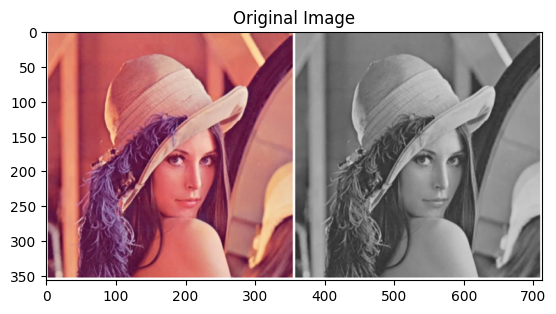

In [41]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. Read and display the image.
try:
    img = Image.open("/lenna_image.png")
    plt.imshow(img)
    plt.title("Original Image")
    plt.show()
except FileNotFoundError:
    print("Error: image.jpg not found. Please ensure the image file exists in the current directory or provide the full path.")
    img = Image.new('RGB', (100, 100), color='white')
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

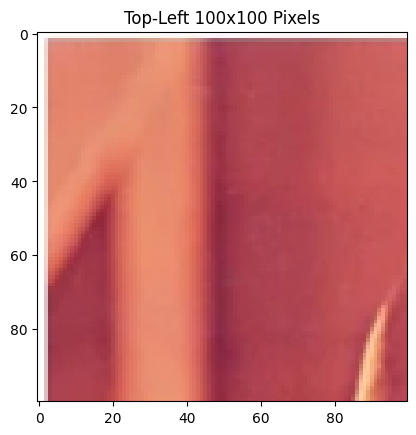

In [ ]:
# 2. Display only the top left corner of 100x100 pixels
img_np = np.array(img)
top_left_corner = img_np[:100, :100]
plt.imshow(top_left_corner)
plt.title("Top-Left 100x100 Pixels")
plt.show()

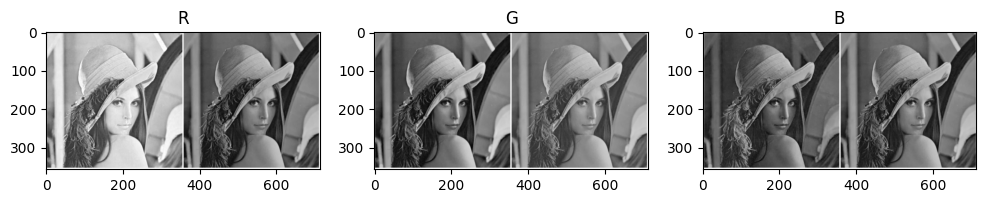

In [ ]:
# 3. Show the three color channels (R, G, B).
if len(img_np.shape) == 3: # Check for color image
  red_channel = img_np[:, :, 0]
  green_channel = img_np[:, :, 1]
  blue_channel = img_np[:, :, 2]

  plt.figure(figsize=(12, 4))

  plt.subplot(1, 3, 1)
  plt.imshow(red_channel, cmap='gray')
  plt.title('R')

  plt.subplot(1, 3, 2)
  plt.imshow(green_channel, cmap='gray')
  plt.title('G')

  plt.subplot(1, 3, 3)
  plt.imshow(blue_channel, cmap='gray')
  plt.title('B')

  plt.show()
else:
  print("The image does not have three color channels (RGB).")

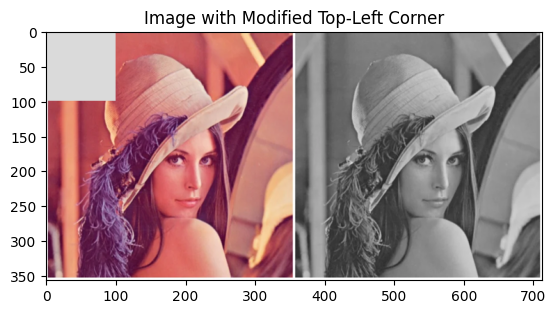

In [ ]:
# 4. Modify the top 100 × 100 pixels to a value of 210
img_modified = img_np.copy() # Avoid modifying original image
img_modified[:100, :100] = 210
plt.imshow(img_modified)
plt.title("Image with Modified Top-Left Corner")
plt.show()

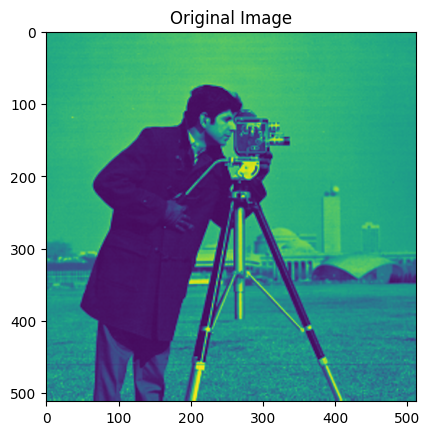

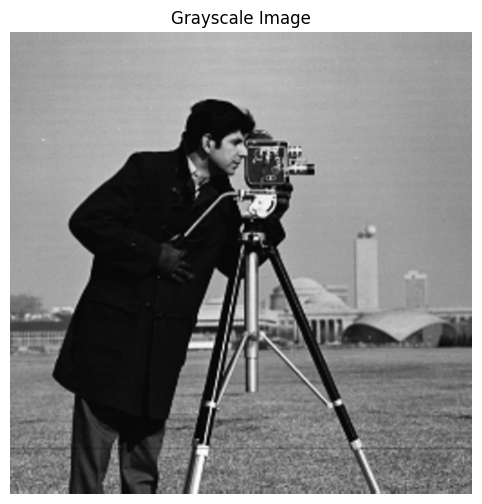

In [ ]:
# 1. Load and display a grayscale image.

try:
    img = Image.open("/cameraman.png")
    plt.imshow(img)
    plt.title("Original Image")
    plt.show()
except FileNotFoundError:
    print("Error: image.jpg not found. Please ensure the image file exists in the current directory or provide the full path.")
    img = Image.new('RGB', (100, 100), color='white')
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

img_gray = img.convert("L")
img_gray_array = np.array(img_gray)

plt.figure(figsize=(8, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()





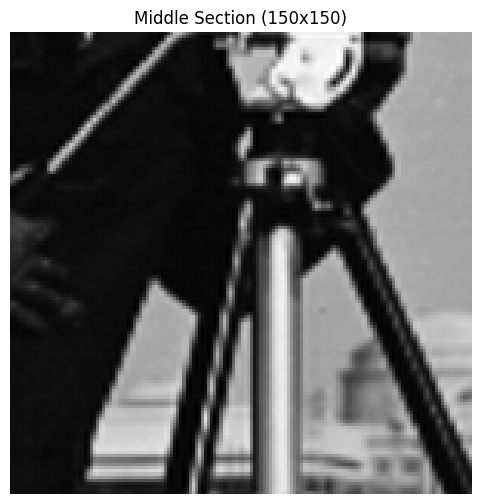

In [ ]:
# 2. Extract and display the middle section of the image (150 pixels).
height, width = img_gray_array.shape
mid_height = height // 2
mid_width = width // 2
start_height = max(0, mid_height - 75)
end_height = min(height, mid_height + 75)
start_width = max(0, mid_width - 75)
end_width = min(width, mid_width + 75)

middle_section = img_gray_array[start_height:end_height, start_width:end_width]

plt.figure(figsize=(8, 6))
plt.imshow(middle_section, cmap='gray')
plt.title("Middle Section (150x150)")
plt.axis('off')
plt.show()

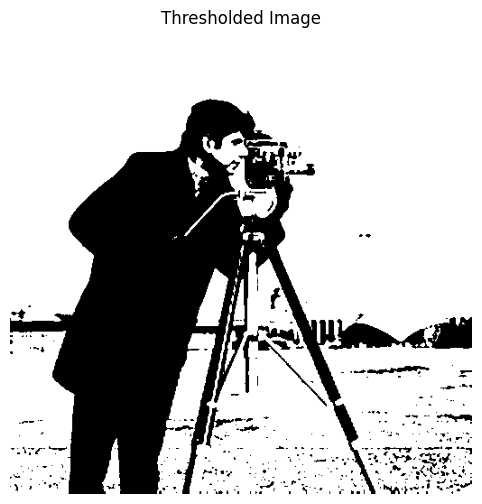

In [ ]:
# 3. Apply a simple threshold to the image.
thresholded_image = np.where(img_gray_array < 100, 0, 255)

plt.figure(figsize=(8, 6))
plt.imshow(thresholded_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()

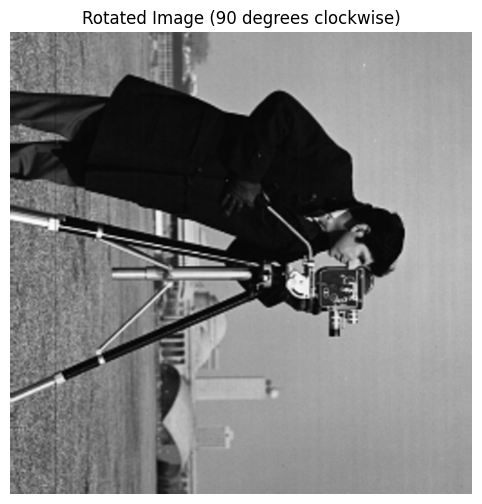

In [ ]:
# 4. Rotate the image 90 degrees clockwise.
rotated_image = img_gray.rotate(270)  # 270 degrees for clockwise rotation

plt.figure(figsize=(8, 6))
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (90 degrees clockwise)")
plt.axis('off')
plt.show()

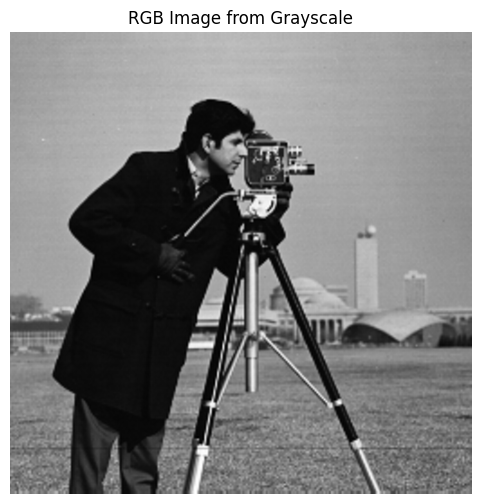

In [ ]:
# 5. Convert the grayscale image to an RGB image.
rgb_image = Image.merge("RGB", (img_gray, img_gray, img_gray))

plt.figure(figsize=(8, 6))
plt.imshow(rgb_image)
plt.title("RGB Image from Grayscale")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
mean = np.mean(img_gray_array, axis=0)  # Calculate mean along columns
centered_data = img_gray_array - mean
# Calculate the covariance matrix
covariance_matrix = np.cov(centered_data.T)  # Transpose for correct covariance calculation




In [ ]:
# 2. Eigen Decomposition and Identifying Principal Components
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [ ]:
# 3. Reconstruction and Experiments
def reconstruct_image(k):
    # Select top k eigenvectors
    principal_components = eigenvectors[:, :k]

    # Transform the data
    transformed_data = np.dot(centered_data, principal_components)  # Use centered_data directly

    # Reconstruct the image
    reconstructed_data = np.dot(transformed_data, principal_components.T) + mean

    # No need to reshape, it's already in the correct shape
    reconstructed_image = reconstructed_data
    return reconstructed_image

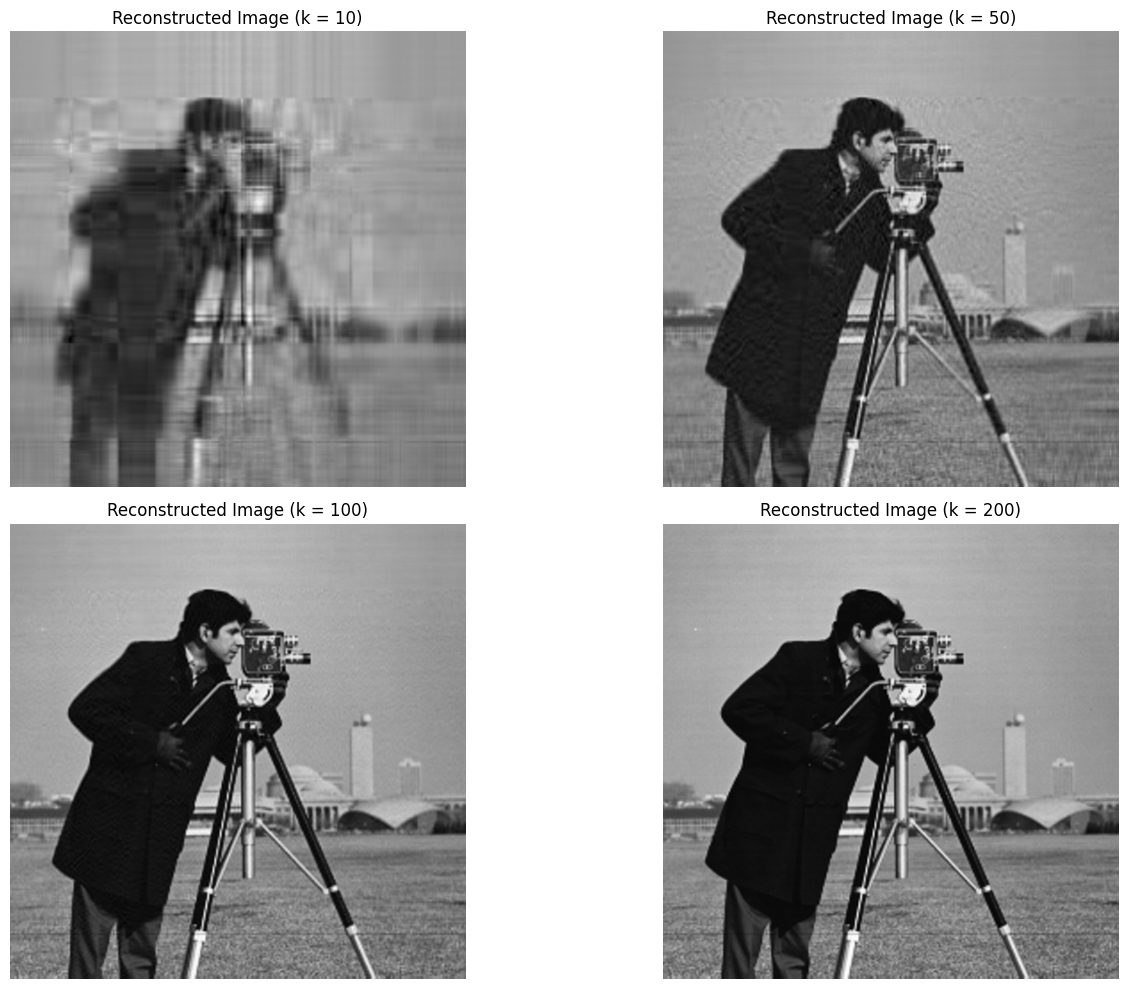

In [ ]:
# Experiment with different numbers of principal components
k_values = [10, 50, 100, 200]
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values):
    reconstructed_image = reconstruct_image(k)

    plt.subplot(2, 2, i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (k = {k})')
    plt.axis('off')

plt.tight_layout()
plt.show()

Explaination:
This solution uses PCA for image compression by reducing dimensionality while retaining essential image details. First, the image is converted to grayscale and centered by subtracting the mean, followed by computing the covariance matrix to capture feature relationships. Eigen decomposition is then performed to obtain eigenvalues and eigenvectors, where the top k principal components are selected based on explained variance. The image is transformed using these components and then reconstructed. Lower k values (e.g., 10, 50) result in more compression but noticeable blurriness, while higher k (e.g., 100, 200) retain finer details with less compression. This method effectively optimizes storage while maintaining image quality.